In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Анализ объявлений о продаже бензиновых полноприводных Mercedes GLB 2021 г.в. с пробегом до 50 000 км в Корее, в период: 07.2024-11.2024. <br>
Загрузим данные из XLS-файла, очистим и обогатим их, обработаем, посчитаем некоторые метрики, построим графики и выгрузим очищенные, обработанные данные в CSV-файл для дальнейшей загрузки в BI-систему**

In [ ]:
# создаем датафрейм из XLS-файла с "грязными" данными
df = pd.read_excel('GLB_kor.xlsx')

In [3]:
df

,№,модель,регистрация,VIN,выпуск,пробег,цена,Кол-во страховых случаев,Выплаты этому авто,Выплаты другому,Комплектация,Цвет,комментарии,Unnamed: 13
0,1.0,250.0,2021-03-01,NaN,2020???,16156,45.9,1.0,587,190,"однозонный климат, без воздуховодов",белый,NaN,NaN
1,2.0,250.0,2021-02-01,101897,2020???,27500,44.9,0.0,0,0,"однозонный климат, без воздуховодов",белый,NaN,NaN
2,3.0,250.0,2021-09-01,152540,2021,41612,44,0.0,0,0,двузонный климат с задними воздуховодами,белый,"продает оф. Дилер, скол на приборной панели",NaN
3,4.0,35.0,2021-12-01,167747,2021-10-01 00:00:00,4642,50.5,0.0,0,0,двузонный климат с задними воздуховодами,белый,NaN,NaN
4,5.0,250.0,2021-04-01,106777,2020???,35301,43.9,0.0,0,0,"однозонный климат, без воздуховодов",черный,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107.0,250.0,2021-05-01,113637,2021,33061,39.5,3.0,13146,805,двузонный климат с задними воздуховодами 5 мест,белый,NaN,NaN
107,108.0,250.0,2021-04-01,87836,2020???,28851,42.5,1.0,6638,536,"1 зонный климат с задними воздуховодами, 5 мест",серый,NaN,NaN
108,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# удаляем лишние пустые строки из конца таблицы

df = df.drop(df.index[108:111])

In [5]:
# удаляем лишние столбцы

df.drop(['Unnamed: 13', '№'], axis=1, inplace=True)

In [6]:
# оставляем в датафрейме только те строки, где пробег у автомобилей меньше 50 000 км

df = df[df['пробег'] < 50000]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 107
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   модель                    100 non-null    float64       
 1   регистрация               100 non-null    datetime64[ns]
 2   VIN                       63 non-null     object        
 3   выпуск                    96 non-null     object        
 4   пробег                    100 non-null    object        
 5   цена                      100 non-null    object        
 6   Кол-во страховых случаев  100 non-null    float64       
 7   Выплаты этому авто        100 non-null    object        
 8   Выплаты другому           100 non-null    object        
 9   Комплектация              100 non-null    object        
 10  Цвет                      100 non-null    object        
 11  комментарии               41 non-null     object        
dtypes: datetime64[ns](1), float

In [8]:
df['цена'].value_counts()

цена
45.5                   8
44                     7
46.5                   6
46                     4
42.5                   3
47.5                   3
44.9                   3
48                     3
44.5                   3
43.3                   3
45.9                   3
43.9                   3
только для корейцев    3
39.5                   2
47                     2
43.5                   2
46.6                   2
49.9                   2
50.5                   2
40.5                   2
46.9                   2
42.4                   2
43.8                   2
41.6                   1
51.8                   1
42.8                   1
41.8                   1
43.2                   1
48.5                   1
42.9                   1
41.9                   1
34.9                   1
43.39                  1
44.7                   1
45                     1
42.3                   1
49.5                   1
49.99                  1
47.8                   1
34                  

In [9]:
# оставляем в датафрейме только те строки, где у автомобилей есть цена

df = df[df['цена'] != 'только для корейцев']

In [10]:
# Добавляем колонку 'модельный год'

df['модельный год'] = np.where(df['регистрация'] < '2021-05-01', 2020, 2021)

In [11]:
# Добавляем колонку 'распределение по пробегу'

df['категория пробега'] = np.where(df['пробег'] < 10000, '0-10000',
    np.where((df['пробег'] >= 10000) & (df['пробег'] < 20000), '10000-20000',
    np.where((df['пробег'] >= 20000) & (df['пробег'] < 30000), '20000-30000',
    np.where((df['пробег'] >= 30000) & (df['пробег'] < 40000), '30000-40000',
    np.where((df['пробег'] >= 40000) & (df['пробег'] <= 50000), '40000-50000', 'более 50000')))))

In [12]:
df['цена'].value_counts()

цена
45.5          8
44            7
46.5          6
46            4
45.9          3
44.5          3
43.3          3
44.9          3
47.5          3
42.5          3
43.9          3
48            3
49.9          2
43.8          2
46.9          2
46.6          2
42.4          2
39.5          2
40.5          2
43.5          2
47            2
50.5          2
49.99         1
42.9          1
41.6          1
51.8          1
45            1
43.39         1
44.7          1
48.5          1
34.9          1
41.9          1
42.8          1
43.2          1
42.3          1
47,9(46,9)    1
47.8          1
34            1
49.5          1
53.8          1
50            1
47.4          1
54            1
53.99         1
42.75         1
41.8          1
52.4          1
43.99         1
37.89         1
41.5          1
Name: count, dtype: int64

In [13]:
df['цена'] = df['цена'].replace('47,9(46,9)', '46.9')

**Преобразуем форматы данных в тех полях, в которых они определены не правильно**

In [14]:
df['цена'] = df['цена'].astype(float)

In [15]:
df['пробег'] = df['пробег'].astype(int)

In [16]:
df['Кол-во страховых случаев'] = df['Кол-во страховых случаев'].astype(int)

In [17]:
df['модель'] = df['модель'].astype(int)

**Вычислим среднюю выплату по автомобилю со страховыми случаями для того чтобы подставить ее в те ячейки, где у нас нет соответствующего значения**

In [ ]:
# df['Выплаты этому авто'] = df['Выплаты этому авто'].replace('$2442', '2442')

In [ ]:
# df['Выплаты этому авто'] = df['Выплаты этому авто'].replace('$1183', '1183')

In [20]:
df_temp =df[df['Выплаты этому авто'] != 0]

In [21]:
df_temp = df_temp[df_temp['Выплаты этому авто'] != '???']

In [22]:
df_temp['Выплаты этому авто'] = df_temp['Выплаты этому авто'].astype(int)

In [23]:
# Вычислили среднюю выплату по автомобилю со страховыми случаями

print(f"Средняя выплата по автомобилю со страховыми случаями: {round(df_temp['Выплаты этому авто'].mean())} $")

Средняя выплата по автомобилю со страховыми случаями: 3641 $


In [24]:
# заменим неопределенное значение поля 'Выплаты этому авто'  '???'  на среднее значение выплаты автомобилю со страховыми случаями

df['Выплаты этому авто'] = df['Выплаты этому авто'].replace('???', round(df_temp['Выплаты этому авто'].mean()))

In [25]:
df['Выплаты этому авто'] = df['Выплаты этому авто'].astype(int)

In [26]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 107
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   модель                    39 non-null     int32         
 1   регистрация               39 non-null     datetime64[ns]
 2   VIN                       26 non-null     object        
 3   выпуск                    38 non-null     object        
 4   пробег                    39 non-null     int32         
 5   цена                      39 non-null     float64       
 6   Кол-во страховых случаев  39 non-null     int32         
 7   Выплаты этому авто        39 non-null     int32         
 8   Выплаты другому           39 non-null     object        
 9   Комплектация              39 non-null     object        
 10  Цвет                      39 non-null     object        
 11  комментарии               14 non-null     object        
 12  модельный год             39

In [ ]:
# pd.set_option('display.max_rows', 50)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 107
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   модель                    97 non-null     int32         
 1   регистрация               97 non-null     datetime64[ns]
 2   VIN                       62 non-null     object        
 3   выпуск                    94 non-null     object        
 4   пробег                    97 non-null     int32         
 5   цена                      97 non-null     float64       
 6   Кол-во страховых случаев  97 non-null     int32         
 7   Выплаты этому авто        97 non-null     int32         
 8   Выплаты другому           97 non-null     object        
 9   Комплектация              97 non-null     object        
 10  Цвет                      97 non-null     object        
 11  комментарии               40 non-null     object        
 12  модельный год             97

In [29]:
print(f"Средняя цена по всем автомобилям: {round(df['цена'].mean(), 2)} млн. вон")

Средняя цена по всем автомобилям: 45.24 млн. вон


In [30]:
print(f"Средний пробег по всем автомобилям: {round(df['пробег'].mean(), 2)} км")

Средний пробег по всем автомобилям: 32517.02 км


(20.0, 55.0)

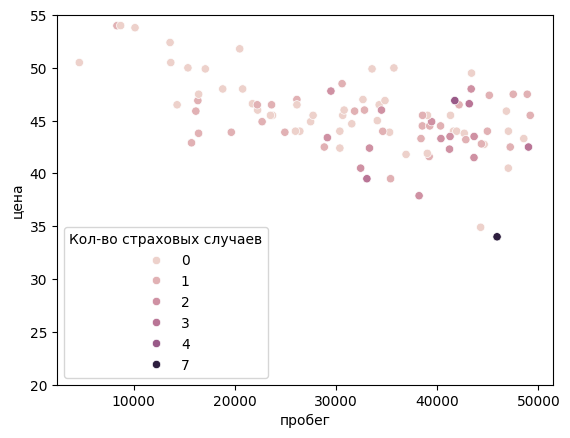

In [ ]:
# Построим график распределения цены и пробега с градацией по количеству страховых случаев

sns.scatterplot(data=df, x='пробег', y='цена', hue='Кол-во страховых случаев')
plt.ylim(20, 55)

In [ ]:
# Создаем отдельный датафрейм для модификации GLB250

df_glb250 = df[df['модель'] == 250]

In [32]:
print(f"Средняя цена по glb250: {round(df_glb250['цена'].mean(), 2)} млн. вон")

Средняя цена по glb250: 44.07 млн. вон


In [33]:
print(f"Средний пробег по по glb250: {round(df_glb250['пробег'].mean(), 2)} км")

Средний пробег по по glb250: 33570.49 км


In [34]:
df_glb250

,модель,регистрация,VIN,выпуск,пробег,цена,Кол-во страховых случаев,Выплаты этому авто,Выплаты другому,Комплектация,Цвет,комментарии,модельный год,категория пробега
0,250,2021-03-01,NaN,2020???,16156,45.90,1,587,190,"однозонный климат, без воздуховодов",белый,NaN,2020,10000-20000
1,250,2021-02-01,101897,2020???,27500,44.90,0,0,0,"однозонный климат, без воздуховодов",белый,NaN,2020,20000-30000
2,250,2021-09-01,152540,2021,41612,44.00,0,0,0,двузонный климат с задними воздуховодами,белый,"продает оф. Дилер, скол на приборной панели",2021,40000-50000
4,250,2021-04-01,106777,2020???,35301,43.90,0,0,0,"однозонный климат, без воздуховодов",черный,NaN,2020,30000-40000
5,250,2021-03-01,92104,2020???,38218,37.89,2,16700,1563,однозонный климат с задними воздуховодами,черный,NaN,2020,30000-40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,250,2021-02-01,NaN,2020???,34091,45.00,0,0,0,"однозонный климат, без воздуховодов, 5 мест",белый,NaN,2020,30000-40000
104,250,2021-06-01,NaN,2021,16427,43.80,1,2106,0,двузонный климат с задними воздуховодами 5 мест,белый,NaN,2021,10000-20000
105,250,2021-01-01,NaN,2020???,43643,41.50,2,0,611,"однозонный климат, без воздуховодов, 5 мест",белый,белый перламутр,2020,40000-50000
106,250,2021-05-01,113637,2021,33061,39.50,3,13146,805,двузонный климат с задними воздуховодами 5 мест,белый,NaN,2021,30000-40000


In [ ]:
# Создаем отдельный датафрейм для модификации GLB35

df_glb35 = df[df['модель'] == 35]

In [36]:
df_glb35.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 3 to 103
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   модель                    21 non-null     int32         
 1   регистрация               21 non-null     datetime64[ns]
 2   VIN                       16 non-null     object        
 3   выпуск                    21 non-null     object        
 4   пробег                    21 non-null     int32         
 5   цена                      21 non-null     float64       
 6   Кол-во страховых случаев  21 non-null     int32         
 7   Выплаты этому авто        21 non-null     int32         
 8   Выплаты другому           21 non-null     object        
 9   Комплектация              21 non-null     object        
 10  Цвет                      21 non-null     object        
 11  комментарии               6 non-null      object        
 12  модельный год             21

In [37]:
df_glb250.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 107
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   модель                    76 non-null     int32         
 1   регистрация               76 non-null     datetime64[ns]
 2   VIN                       46 non-null     object        
 3   выпуск                    73 non-null     object        
 4   пробег                    76 non-null     int32         
 5   цена                      76 non-null     float64       
 6   Кол-во страховых случаев  76 non-null     int32         
 7   Выплаты этому авто        76 non-null     int32         
 8   Выплаты другому           76 non-null     object        
 9   Комплектация              76 non-null     object        
 10  Цвет                      76 non-null     object        
 11  комментарии               34 non-null     object        
 12  модельный год             76

In [38]:
print(f"Средняя цена по glb35: {round(df_glb35['цена'].mean(), 2)} млн. вон")

Средняя цена по glb35: 49.48 млн. вон


In [39]:
print(f"Средний пробег по по glb35: {round(df_glb35['пробег'].mean(), 2)} км")

Средний пробег по по glb35: 28704.48 км


In [40]:
df_glb250['Кол-во страховых случаев'].value_counts()

Кол-во страховых случаев
0    35
1    26
2    11
3     3
7     1
Name: count, dtype: int64

In [41]:
df_glb250_no_as = df_glb250[df_glb250['Кол-во страховых случаев'] == 0]

(20.0, 50.0)

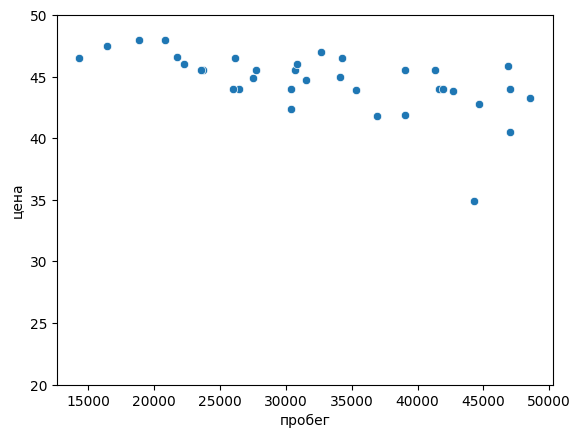

In [42]:
# ищем выбросы среди автомобилей glb250 без страховых выплат

sns.scatterplot(data=df_glb250_no_as, x='пробег', y='цена')
plt.ylim(20, 50)

In [43]:
# средняя цена glb250 без страховых случаев до удаления выброса
round(df_glb250_no_as['цена'].mean(), 2)

44.61

In [44]:
# Удаляем выброс

df_glb250_no_as = df_glb250_no_as[df_glb250_no_as['цена'] >= 40]

(20.0, 50.0)

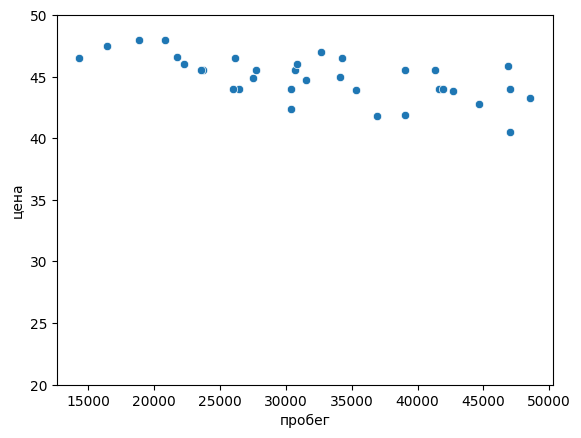

In [45]:
# смотрим график после удаления выброса
sns.scatterplot(data=df_glb250_no_as, x='пробег', y='цена')
plt.ylim(20, 50)

In [46]:
# средняя цена glb250 без страховых случаев после удаления выброса
round(df_glb250_no_as['цена'].mean(), 2)

44.9

In [47]:
# средний пробег glb250 без страховых случаев после удаления выброса
round(df_glb250_no_as['пробег'].mean())

32420

In [48]:
df_glb250_as = df_glb250[df_glb250['Кол-во страховых случаев'] > 0]

In [49]:
# средняя цена glb250 со страховыми случаями 

round(df_glb250_as['цена'].mean(), 2)

43.61

In [50]:
# выброс  

df_glb250[(df_glb250['Кол-во страховых случаев'] == 0) & (df_glb250['цена'] < 40 )]

,модель,регистрация,VIN,выпуск,пробег,цена,Кол-во страховых случаев,Выплаты этому авто,Выплаты другому,Комплектация,Цвет,комментарии,модельный год,категория пробега
94,250,2021-08-01,NaN,2021,44300,34.9,0,0,0,двузонный климат с задними воздуховодами 7 мест,белый,"продает частник, машина явно после дтп",2021,40000-50000


In [51]:
# переносим выброс в датафрейм со страхоывми случаями

df_glb250_as = pd.concat([df_glb250_as, df_glb250[(df_glb250['Кол-во страховых случаев'] == 0) & (df_glb250['цена'] < 40 )]])

In [52]:
# средняя цена glb250 со страховыми случаями после переноса выброса 

round(df_glb250_as['цена'].mean(), 2)

43.4

In [53]:
# средний пробег glb250 со страховыми случаями после переноса выброса
round(df_glb250_as['пробег'].mean())

34502

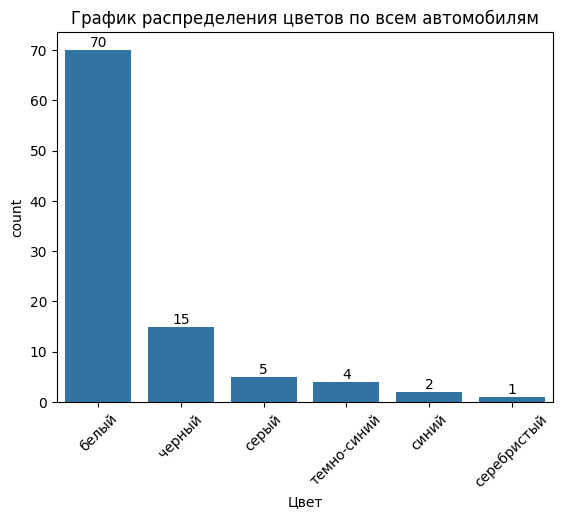

In [54]:

order = df['Цвет'].value_counts().index
ax = sns.countplot(data=df, x='Цвет', order = order)
plt.xticks(rotation=45)
plt.title('График распределения цветов по всем автомобилям')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

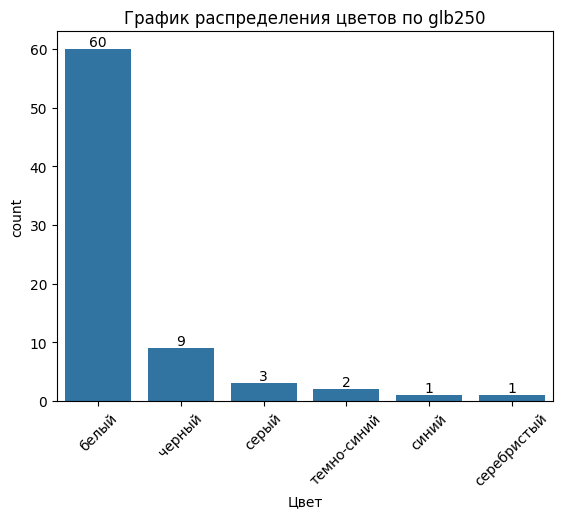

In [55]:
order = df_glb250['Цвет'].value_counts().index
ax = sns.countplot(data=df_glb250, x='Цвет', order = order)
plt.xticks(rotation=45)
plt.title('График распределения цветов по glb250')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

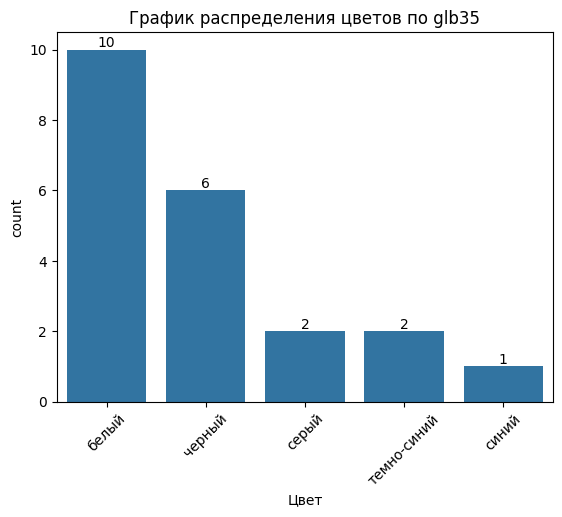

In [56]:
order = df_glb35['Цвет'].value_counts().index
ax = sns.countplot(data=df_glb35, x='Цвет', order = order)
plt.xticks(rotation=45)
plt.title('График распределения цветов по glb35')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [57]:
# средний пробег glb250 без страховых случаев при выборке машин с пробегом до 30 000 км

round(df_glb250_no_as[df_glb250_no_as['пробег'] <= 30000]['пробег'].mean())

22726

In [58]:
# средняя цена glb250 без страховых случаев c пробегом до 30 000 км

round(df_glb250_no_as[df_glb250_no_as['пробег'] <= 30000]['цена'].mean(), 2)

46.04

In [59]:
df_glb250_no_as[df_glb250_no_as['пробег'] <= 30000]

,модель,регистрация,VIN,выпуск,пробег,цена,Кол-во страховых случаев,Выплаты этому авто,Выплаты другому,Комплектация,Цвет,комментарии,модельный год,категория пробега
1,250,2021-02-01,101897,2020???,27500,44.9,0,0,0,"однозонный климат, без воздуховодов",белый,NaN,2020,20000-30000
29,250,2021-02-01,NaN,2020???,26433,44.0,0,0,0,"однозонный климат, без воздуховодов",белый,загаженный багажник,2020,20000-30000
38,250,2021-10-01,155073,2021,18812,48.0,0,0,0,"двузонный климат с задними воздуховодами, 7 мест",серебристый,NaN,2021,10000-20000
39,250,2021-04-01,NaN,NaN,26000,44.0,0,0,0,???,черный,NaN,2020,20000-30000
40,250,2021-04-01,106025,2020???,14305,46.5,0,0,0,"однозонный климат, без воздуховодов, 5 мест",белый,cветлый салон на экокоже,2020,10000-20000
48,250,2021-04-01,NaN,2020???,20781,48.0,0,0,0,"однозонный климат, без воздуховодов, 7 мест",белый,продает оф. Дилер,2020,20000-30000
67,250,2021-01-01,NaN,2020???,21750,46.6,0,0,0,"однозонный климат, без воздуховодов, 5 мест",белый,Болты передних крыльев подозрительные,2020,20000-30000
70,250,2021-03-01,NaN,2020???,16434,47.5,0,0,0,однозонный климат с задними воздуховодами с по...,белый,NaN,2020,10000-20000
81,250,2021-03-01,79879,2020,27742,45.5,0,0,0,"однозонный климат с задними воздуховодами, 5 мест",белый,NaN,2020,20000-30000
84,250,2021-02-01,104375,2020???,22262,46.0,0,0,0,"однозонный климат, без воздуховодов, 5 мест",белый,"тюнингованые выхлопные трубы, черные",2020,20000-30000


In [60]:
# средняя цена glb250 2021 модельного года без страховых случаев c пробегом до 30 000 км

round(df_glb250_no_as[(df_glb250_no_as['пробег'] <= 30000) & (df_glb250_no_as['модельный год'] == 2021)]['цена'].mean(), 2)

46.75

In [ ]:
# glb250 2021 модельного года без страховых случаев c пробегом до 30 000 км

df_glb250_no_as[(df_glb250_no_as['пробег'] <= 31000) & (df_glb250_no_as['модельный год'] == 2021)]

,модель,регистрация,VIN,выпуск,пробег,цена,Кол-во страховых случаев,Выплаты этому авто,Выплаты другому,Комплектация,Цвет,комментарии,модельный год,категория пробега
30,250,2021-08-01,152242,2021,30670,45.5,0,0,0,"двузонный климат с задними воздуховодами, 7 мест",серый,не продается на экспорт в РФ,2021,30000-40000
38,250,2021-10-01,155073,2021,18812,48.0,0,0,0,"двузонный климат с задними воздуховодами, 7 мест",серебристый,NaN,2021,10000-20000
52,250,2021-08-01,148431,2021,30385,44.0,0,0,0,"двузонный климат с задними воздуховодами, 7 мест",белый,NaN,2021,30000-40000
99,250,2021-06-01,120257,2021,23531,45.5,0,0,0,двузонный климат с задними воздуховодами 5 мест,белый,AMG решетка,2021,20000-30000


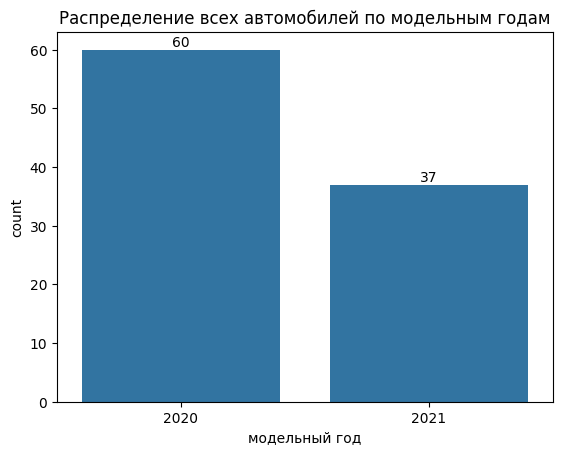

In [62]:
ax = sns.countplot(data=df, x = 'модельный год')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Распределение всех автомобилей по модельным годам')
plt.show()

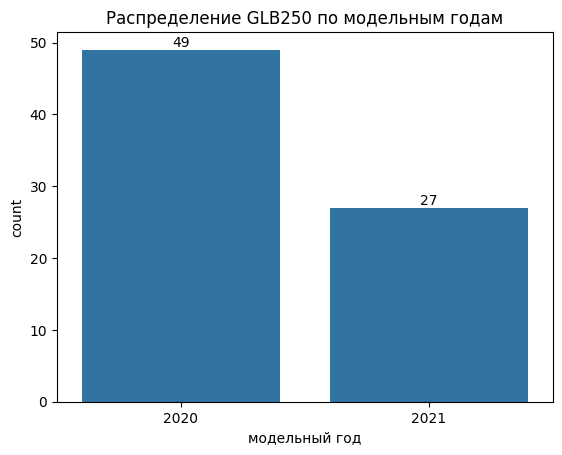

In [63]:
ax = sns.countplot(data=df_glb250, x = 'модельный год')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Распределение GLB250 по модельным годам')
plt.show()

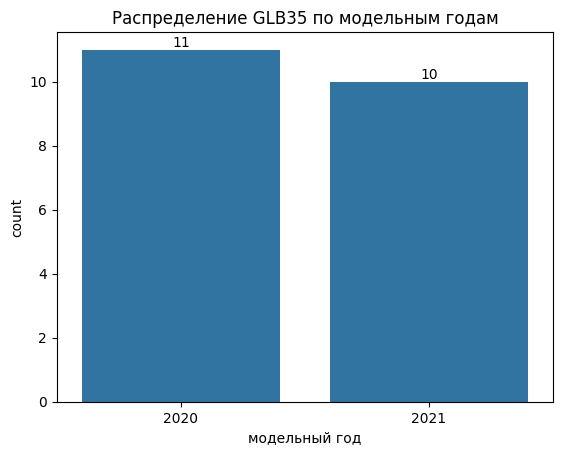

In [64]:
ax = sns.countplot(data=df_glb35, x = 'модельный год')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Распределение GLB35 по модельным годам')
plt.show()

In [65]:
df['категория пробега'].value_counts(ascending=True)

категория пробега
0-10000         3
10000-20000    13
20000-30000    19
40000-50000    31
30000-40000    31
Name: count, dtype: int64

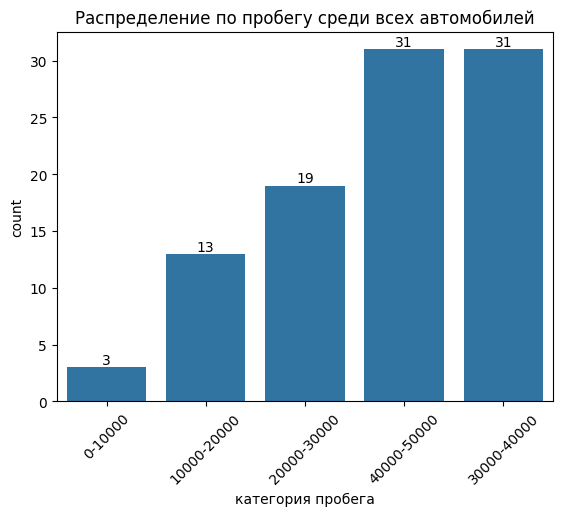

In [66]:
ax = sns.countplot(data=df, x = 'категория пробега', order = df['категория пробега'].value_counts(ascending=True).index)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 45)
plt.title('Распределение по пробегу среди всех автомобилей')
plt.show()

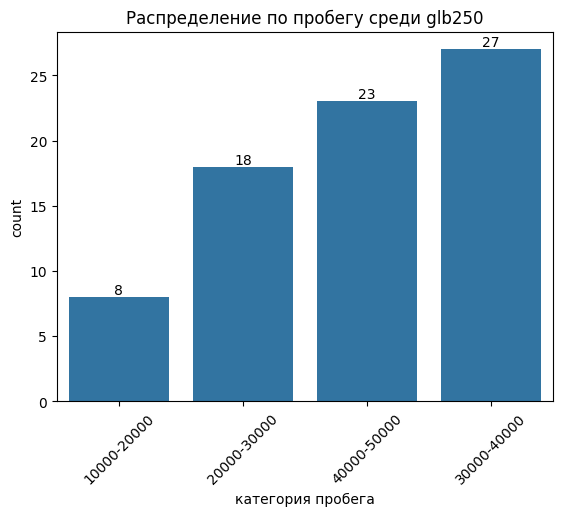

In [67]:
ax = sns.countplot(data=df_glb250, x = 'категория пробега', order = df_glb250['категория пробега'].value_counts(ascending=True).index)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 45)
plt.title('Распределение по пробегу среди glb250')
plt.show()

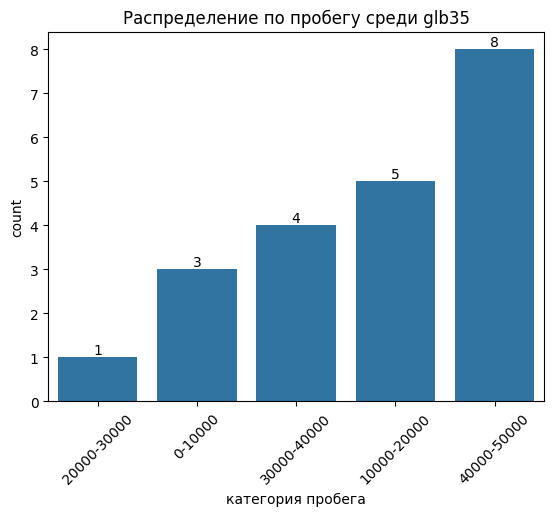

In [68]:
ax = sns.countplot(data=df_glb35, x = 'категория пробега', order = df_glb35['категория пробега'].value_counts(ascending=True).index)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 45)
plt.title('Распределение по пробегу среди glb35')
plt.show()

In [69]:
df

,модель,регистрация,VIN,выпуск,пробег,цена,Кол-во страховых случаев,Выплаты этому авто,Выплаты другому,Комплектация,Цвет,комментарии,модельный год,категория пробега
0,250,2021-03-01,NaN,2020???,16156,45.9,1,587,190,"однозонный климат, без воздуховодов",белый,NaN,2020,10000-20000
1,250,2021-02-01,101897,2020???,27500,44.9,0,0,0,"однозонный климат, без воздуховодов",белый,NaN,2020,20000-30000
2,250,2021-09-01,152540,2021,41612,44.0,0,0,0,двузонный климат с задними воздуховодами,белый,"продает оф. Дилер, скол на приборной панели",2021,40000-50000
3,35,2021-12-01,167747,2021-10-01 00:00:00,4642,50.5,0,0,0,двузонный климат с задними воздуховодами,белый,NaN,2021,0-10000
4,250,2021-04-01,106777,2020???,35301,43.9,0,0,0,"однозонный климат, без воздуховодов",черный,NaN,2020,30000-40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,35,2021-02-01,88387,2020???,41749,46.9,4,6525,1369,"однозонный климат, без воздуховодов, 5 мест",белый,NaN,2020,40000-50000
104,250,2021-06-01,NaN,2021,16427,43.8,1,2106,0,двузонный климат с задними воздуховодами 5 мест,белый,NaN,2021,10000-20000
105,250,2021-01-01,NaN,2020???,43643,41.5,2,0,611,"однозонный климат, без воздуховодов, 5 мест",белый,белый перламутр,2020,40000-50000
106,250,2021-05-01,113637,2021,33061,39.5,3,13146,805,двузонный климат с задними воздуховодами 5 мест,белый,NaN,2021,30000-40000


***Создадим новый датасет с очищенными данными, выгрузим в него только те колонки, которые в дальнейшем будем использовать в BI-системе для подготовки дашборда***

In [70]:
df_out = df[['модель', 'пробег', 'цена', 'Кол-во страховых случаев', 'Выплаты этому авто', 'Цвет', 'модельный год', 'категория пробега']]

In [75]:
# переведем названия колонок на англ. язык. Это понадобится нам при дальнешей загрузке этих данных в различные СУБД или BI-системы, во избежании конфликтов с названиями полей на кириллице

df_out.columns = ['model', 'miliage', 'price', 'number of insure', 'insurance payments', 'color', 'model year', 'miliage category' ]

In [72]:
# выгружаем очищенные данные в CSV

df_out.to_csv('GLB.csv', index=False, encoding="cp1251")